        Sex  Pclass   Age
0      male       3  22.0
1    female       1  38.0
2    female       3  26.0
3    female       1  35.0
4      male       3  35.0
..      ...     ...   ...
886    male       2  27.0
887  female       1  19.0
888  female       3   NaN
889    male       1  26.0
890    male       3  32.0

[891 rows x 3 columns]
             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245
Age, Cabin, and Embarked has missing data.


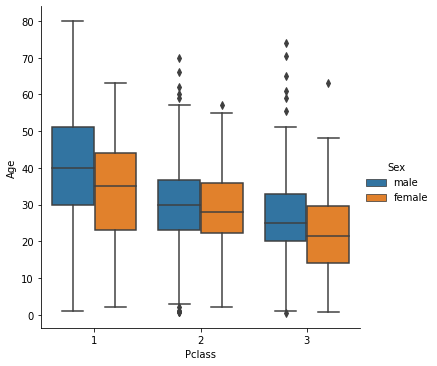

根據第一個box chart可看出些微趨勢,女性艙等越高年紀越大,但其年紀橫跨範圍仍很廣


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

df_train = pd.read_csv("Titanic_train.csv")
print(df_train[['Sex', 'Pclass', 'Age']])

missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)
print("Age, Cabin, and Embarked has missing data.")

g = sns.catplot(x = "Pclass", y = "Age", hue = "Sex", data = df_train, kind = "box")
plt.show()
print("根據第一個box chart可看出些微趨勢,女性艙等越高年紀越大,但其年紀橫跨範圍仍很廣")

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

df_train = pd.read_csv("Titanic_train.csv")
data = df_train.copy() #複製一份資料給 data
from sklearn import preprocessing
# Step1 : 離散轉連續型資料
le = preprocessing.LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
display(data[['Sex', 'Age', 'Pclass']])
# Step 2 : 計算資料點的倆倆距離
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(data[['Sex', 'Age', 'Pclass']])))
# Step3 : 透過 KNN 進行補值
value_neighbors = 3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = value_neighbors, weights = 'distance')
df_filled = pd.DataFrame(imputer.fit_transform(data[['Sex', 'Age', 'Pclass']]))
display(df_filled)

,Sex,Age,Pclass
0,1,22.0,3
1,0,38.0,1
2,0,26.0,3
3,0,35.0,1
4,1,35.0,3
...,...,...,...
886,1,27.0,2
887,0,19.0,1
888,0,NaN,3
889,1,26.0,1


,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


,0,1,2
0,1.0,22.0,3.0
1,0.0,38.0,1.0
2,0.0,26.0,3.0
3,0.0,35.0,1.0
4,1.0,35.0,3.0
...,...,...,...
886,1.0,27.0,2.0
887,0.0,19.0,1.0
888,0.0,19.0,3.0
889,1.0,26.0,1.0
